In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-07-12 19:06:28--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.6’

spam.csv.6          100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-07-12 19:06:29 (11.7 MB/s) - ‘spam.csv.6’ saved [503663/503663]



In [ ]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

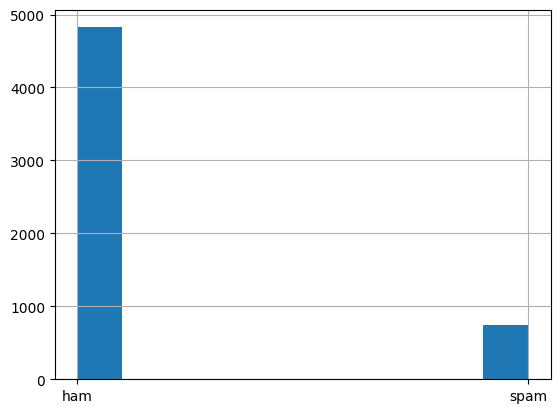

In [ ]:
df.labels.hist()

In [ ]:
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
y = df['b_labels'].to_numpy()

In [ ]:
df

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df['data'],y,test_size=.33)

In [ ]:
featurizer = CountVectorizer(decode_error='ignore')
xtrain = featurizer.fit_transform(xtrain)
xtest = featurizer.transform(xtest)

In [ ]:
# featurizer = TfidfVectorizer(decode_error='ignore')
# xtrain = featurizer.fit_transform(xtrain)
# xtest = featurizer.transform(xtest)

In [ ]:
xtrain

<3733x7000 sparse matrix of type '<class 'numpy.int64'>'
	with 49273 stored elements in Compressed Sparse Row format>

In [ ]:
model = MultinomialNB()
model.fit(xtrain,ytrain)
print('train score: ',model.score(xtrain,ytrain))
print('test score: ',model.score(xtest,ytest))


train score:  0.9927672113581569
test score:  0.9874932028276238


In [ ]:
ptrain = model.predict(xtrain)
ptest = model.predict(xtest)
print('train f1: ',f1_score(ytrain,ptrain))
print('test f1: ',f1_score(ytest,ptest))

train f1:  0.9731876861966237
test f1:  0.9505376344086022


In [ ]:
prob_train = model.predict_proba(xtrain)[:,1]
prob_test = model.predict_proba(xtest)[:,1]
print('train auc: ',roc_auc_score(ytrain,prob_train))
print('test auc: ',roc_auc_score(ytest,prob_test))

train auc:  0.9940327051777288
test auc:  0.9814454346466541


In [ ]:
cm = confusion_matrix(ytrain,ptrain)
cm

array([[3216,   10],
       [  17,  490]])

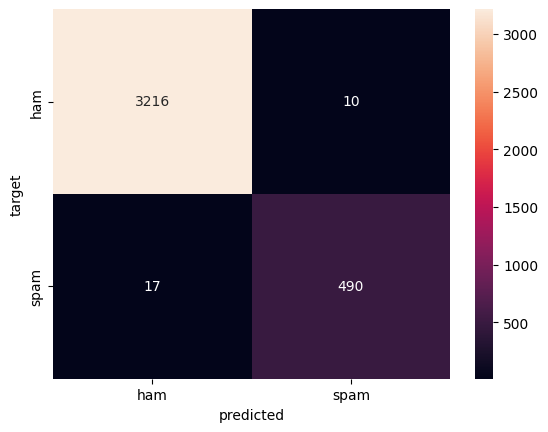

In [ ]:
def plot_cm(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm,index=classes,columns=classes)
  ax = sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('predicted')
  ax.set_ylabel('target')

plot_cm(cm)

In [ ]:
cm_test =  confusion_matrix(ytest,ptest)
cm_test

array([[1595,    4],
       [  19,  221]])

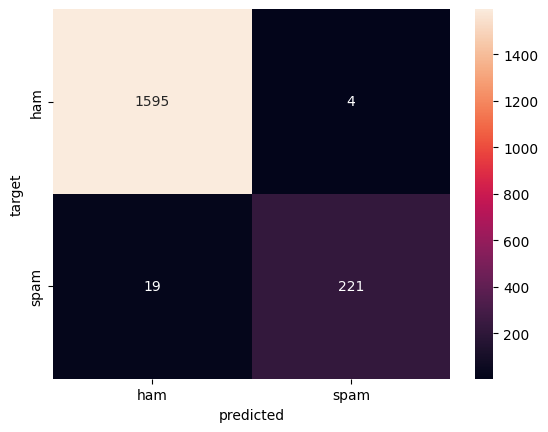

In [ ]:
def plot_cm_test(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm,index=classes,columns=classes)
  ax = sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('predicted')
  ax.set_ylabel('target')

plot_cm(cm_test)

In [ ]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg+' '

  wordcloud  = WordCloud(width=600,height=500).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

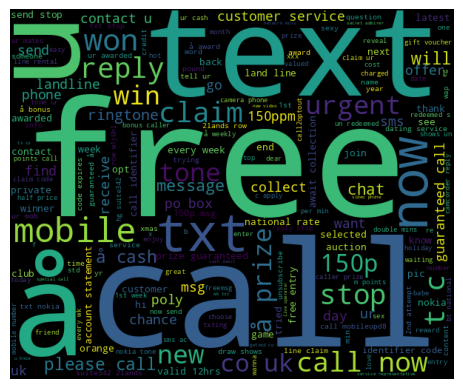

In [ ]:
visualize('spam')

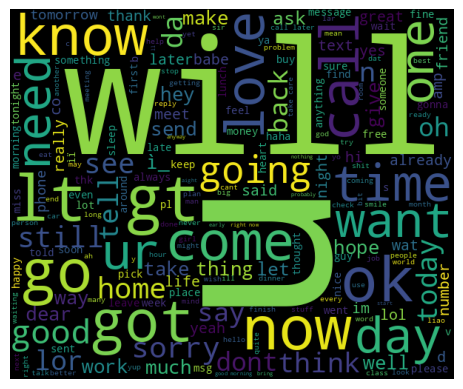

In [ ]:
visualize('ham')

In [ ]:
x = featurizer.transform(df['data'])
df['predictions'] = model.predict(x)

In [ ]:
sneaky_spam =  df[(df['predictions']==0) & (df['b_labels'] ==1)]['data']
for msg in sneaky_spam:
  print(msg,end='\n')

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
SMS. ac JSco: Energy is high, but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO
Would you like to see my XXX pics they are so hot they were nearly banned 

In [ ]:
not_actually_spam =  df[(df['predictions']==1) & (df['b_labels'] ==0)]['data']
for msg in not_actually_spam:
  print(msg,end='\n')

Yes:)from last week itself i'm taking live call.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
